<a href="https://colab.research.google.com/github/PurnamaRidzkyN/Petals_to_the_Metal_Flower_Classification/blob/main/Petals_to_the_Metal_Flower_Classification_on_TPU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES
# TO THE CORRECT LOCATION (/kaggle/input) IN YOUR NOTEBOOK,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.

import os
import sys
from tempfile import NamedTemporaryFile
from urllib.request import urlopen
from urllib.parse import unquote, urlparse
from urllib.error import HTTPError
from zipfile import ZipFile
import tarfile
import shutil

CHUNK_SIZE = 40960
DATA_SOURCE_MAPPING = 'tpu-getting-started:https%3A%2F%2Fstorage.googleapis.com%2Fkaggle-competitions-data%2Fkaggle-v2%2F21154%2F1243559%2Fbundle%2Farchive.zip%3FX-Goog-Algorithm%3DGOOG4-RSA-SHA256%26X-Goog-Credential%3Dgcp-kaggle-com%2540kaggle-161607.iam.gserviceaccount.com%252F20241002%252Fauto%252Fstorage%252Fgoog4_request%26X-Goog-Date%3D20241002T082835Z%26X-Goog-Expires%3D259200%26X-Goog-SignedHeaders%3Dhost%26X-Goog-Signature%3D5e5f13a9fadae587df051a9fb0061e469c38076924af86c73d21a35574d6ce5226c8608ca422111bc0ceeed357df44c1551aa638aab55529302547319f7fa6fd9d50a44c3fb242c70b9481860bd1f72e1bdb14c2d31b65977f1b0f579f2b70c9224270134229d47e84922720df3cf5de6c94dc95259f4307390e6dcb7d82e0e6d54bcc4d026f57bf00737126b1609c3f2e9a151c03a32f0f0a3b422aab0b722141e3bd3c9155482cfc6dd036529c888aa1bfcab9f47ae2b2e73df54449573aa9d64e5a52580d687f57071801bb3ca9eea4c3fe4b32c41d8f050aed5fa0f3ab152116fabad37762cb415fa1bb6656e14ed065ed6b1dfab4c6678996d5e86c99a7'

KAGGLE_INPUT_PATH='/kaggle/input'
KAGGLE_WORKING_PATH='/kaggle/working'
KAGGLE_SYMLINK='kaggle'

!umount /kaggle/input/ 2> /dev/null
shutil.rmtree('/kaggle/input', ignore_errors=True)
os.makedirs(KAGGLE_INPUT_PATH, 0o777, exist_ok=True)
os.makedirs(KAGGLE_WORKING_PATH, 0o777, exist_ok=True)

try:
  os.symlink(KAGGLE_INPUT_PATH, os.path.join("..", 'input'), target_is_directory=True)
except FileExistsError:
  pass
try:
  os.symlink(KAGGLE_WORKING_PATH, os.path.join("..", 'working'), target_is_directory=True)
except FileExistsError:
  pass

for data_source_mapping in DATA_SOURCE_MAPPING.split(','):
    directory, download_url_encoded = data_source_mapping.split(':')
    download_url = unquote(download_url_encoded)
    filename = urlparse(download_url).path
    destination_path = os.path.join(KAGGLE_INPUT_PATH, directory)
    try:
        with urlopen(download_url) as fileres, NamedTemporaryFile() as tfile:
            total_length = fileres.headers['content-length']
            print(f'Downloading {directory}, {total_length} bytes compressed')
            dl = 0
            data = fileres.read(CHUNK_SIZE)
            while len(data) > 0:
                dl += len(data)
                tfile.write(data)
                done = int(50 * dl / int(total_length))
                sys.stdout.write(f"\r[{'=' * done}{' ' * (50-done)}] {dl} bytes downloaded")
                sys.stdout.flush()
                data = fileres.read(CHUNK_SIZE)
            if filename.endswith('.zip'):
              with ZipFile(tfile) as zfile:
                zfile.extractall(destination_path)
            else:
              with tarfile.open(tfile.name) as tarfile:
                tarfile.extractall(destination_path)
            print(f'\nDownloaded and uncompressed: {directory}')
    except HTTPError as e:
        print(f'Failed to load (likely expired) {download_url} to path {destination_path}')
        continue
    except OSError as e:
        print(f'Failed to load {download_url} to path {destination_path}')
        continue

print('Data source import complete.')


In [ ]:
## This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tpu-getting-started/sample_submission.csv
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/09-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/14-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/01-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/13-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/00-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/07-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/12-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/11-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/05-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/04-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/15-224x224-232.tfrec
/kaggle/input/tpu-getting-started/tfrecord

# **LOAD DATA**

In [ ]:
import math, re, os
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

# Mengimpor regularizer l2
from tensorflow.keras.regularizers import l2
from tensorflow import keras
from tensorflow.keras import layers, regularizers
from tensorflow.keras.models import Sequential


2024-09-30 13:39:58.570240: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-30 13:39:58.570368: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-30 13:39:58.726693: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [ ]:
# Detect TPU, return appropriate distribution strategy
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Running on TPU ', tpu.master())
except ValueError:
    tpu = None

if tpu:
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
else:
    strategy = tf.distribute.get_strategy()

print("REPLICAS: ", strategy.num_replicas_in_sync)

REPLICAS:  1


In [ ]:
tfrec_192_train = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-192x192/train/*.tfrec")
tfrec_192_val = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-192x192/val/*.tfrec")
tfrec_192_test = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-192x192/test/*.tfrec")

tfrec_224_train = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/train/*.tfrec")
tfrec_224_val = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/val/*.tfrec")
tfrec_224_test = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-224x224/test/*.tfrec")

tfrec_331_train = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-331x331/train/*.tfrec")
tfrec_331_val = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-331x331/val/*.tfrec")
tfrec_331_test = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-331x331/test/*.tfrec")

tfrec_512_train = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-512x512/train/*.tfrec")
tfrec_512_val = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-512x512/val/*.tfrec")
tfrec_512_test = tf.io.gfile.glob("/kaggle/input/tpu-getting-started/tfrecords-jpeg-512x512/test/*.tfrec")



In [ ]:
AUTO = tf.data.experimental.AUTOTUNE

# Define function to decode images
def decode_image(image_data, image_size):
    image = tf.image.decode_jpeg(image_data, channels=3)
    image = tf.cast(image, tf.float32) / 255.0  # convert image to floats in [0, 1] range
    image = tf.image.resize(image, [*image_size])  # resize image to the desired size
    return image

# Read unlabeled TFRecord
def read_unlabeled_tfrecord(example, image_size):
    UNLABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "id": tf.io.FixedLenFeature([], tf.string),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, UNLABELED_TFREC_FORMAT)
    image = decode_image(example['image'], image_size)
    idnum = example['id']
    return image, idnum # returns a dataset of image(s)

# Read labeled TFRecord
def read_labeled_tfrecord(example, image_size):
    LABELED_TFREC_FORMAT = {
        "image": tf.io.FixedLenFeature([], tf.string), # tf.string means bytestring
        "class": tf.io.FixedLenFeature([], tf.int64),  # shape [] means single element
    }
    example = tf.io.parse_single_example(example, LABELED_TFREC_FORMAT)
    image = decode_image(example['image'], image_size)
    label = tf.cast(example['class'], tf.int32)
    return image, label # returns a dataset of (image, label) pairs

# Load dataset without sample limit
def load_dataset(filenames, labeled=True, ordered=False, image_size=(512, 512)):
    # Set options for TFRecordDataset
    ignore_order = tf.data.Options()
    if not ordered:
        ignore_order.experimental_deterministic = False  # disable order, increase speed

    dataset = tf.data.TFRecordDataset(filenames, num_parallel_reads=AUTO)  # read multiple files
    dataset = dataset.with_options(ignore_order)  # optimize for speed, ignore order
    dataset = dataset.map(lambda x: read_labeled_tfrecord(x, image_size) if labeled else read_unlabeled_tfrecord(x, image_size),
                          num_parallel_calls=AUTO)
    return dataset

In [ ]:
# Define image sizes
IMAGE_SIZE_192 = (128, 128)
IMAGE_SIZE_224 = IMAGE_SIZE_192
IMAGE_SIZE_331 = IMAGE_SIZE_192
IMAGE_SIZE_512 = IMAGE_SIZE_192

In [ ]:
import tensorflow as tf

def print_sample_labels(tfrecord_file):
    dataset = tf.data.TFRecordDataset([tfrecord_file])

    # Define feature description
    feature_description = {
        "image": tf.io.FixedLenFeature([], tf.string),
        "class": tf.io.FixedLenFeature([], tf.int64)  # Assuming this is the label field
    }

    def _parse_function(proto):
        parsed_features = tf.io.parse_single_example(proto, feature_description)
        return parsed_features['image'], parsed_features['class']

    dataset = dataset.map(_parse_function)

    for image, label in dataset.take(5):  # Print first 5 samples
        print(f"Label: {label.numpy()}")

# Replace with your TFRecord file path
print_sample_labels('/kaggle/input/tpu-getting-started/tfrecords-jpeg-192x192/train/00-192x192-798.tfrec')



Label: 57
Label: 10
Label: 82
Label: 102
Label: 94


In [ ]:
# Define the dataset functions

batch_size = 32
def augment_image(image, label):
    # Resize gambar
 # Mengubah ukuran gambar
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.7, upper=1.3)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_hue(image, max_delta=0.1)

    # Pastikan gambar tetap dalam rentang nilai yang valid
    image = tf.clip_by_value(image, 0.0, 1.0)
    return image, label

def get_training_dataset(filenames, image_size):
    dataset = load_dataset(filenames, labeled=True, image_size=image_size)
    dataset = dataset.map(augment_image, num_parallel_calls=AUTO)
    dataset = dataset.batch(batch_size)
    dataset = dataset.repeat()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_validation_dataset(filenames, image_size, ordered=False):
    dataset = load_dataset(filenames, labeled=True, image_size=image_size, ordered=ordered)
    dataset = dataset.batch(batch_size)
    dataset = dataset.cache()
    dataset = dataset.repeat()
    dataset = dataset.prefetch(AUTO)
    return dataset

def get_test_dataset(filenames, image_size, ordered=False):
    dataset = load_dataset(filenames, labeled=False, image_size=image_size, ordered=ordered)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(AUTO)
    return dataset

def count_data_items(filenames):
    # jumlah data item ditulis dalam nama file .tfrec
    n = [int(re.compile(r"-([0-9]*)\.").search(filename).group(1)) for filename in filenames]
    return np.sum(n)

In [ ]:
NUM_TRAINING_IMAGES_192 = count_data_items(tfrec_192_train)
NUM_VALIDATION_IMAGES_192 = count_data_items(tfrec_192_val)
NUM_TEST_IMAGES_192 = count_data_items(tfrec_192_test)

NUM_TRAINING_IMAGES_224 =count_data_items(tfrec_224_train)
NUM_VALIDATION_IMAGES_224 = count_data_items(tfrec_224_val)
NUM_TEST_IMAGES_224 = count_data_items(tfrec_224_test)

NUM_TRAINING_IMAGES_331 = count_data_items(tfrec_331_train)
NUM_VALIDATION_IMAGES_331 =  count_data_items(tfrec_331_val)
NUM_TEST_IMAGES_331 = count_data_items(tfrec_331_test)

NUM_TRAINING_IMAGES_512 = count_data_items(tfrec_512_train)
NUM_VALIDATION_IMAGES_512 = count_data_items(tfrec_512_val)
NUM_TEST_IMAGES_512 = count_data_items(tfrec_512_test)

In [ ]:
print (count_data_items(tfrec_192_train))
print (count_data_items(tfrec_192_val))
print (count_data_items(tfrec_192_test))

12753
3712
7382


In [ ]:
  # Contoh, sesuaikan dengan kebutuhan

# Pastikan dataset 192x192 menggunakan batching
train_dataset_192 = get_training_dataset(tfrec_192_train, IMAGE_SIZE_192)
val_dataset_192 = get_validation_dataset(tfrec_192_val, IMAGE_SIZE_192)
test_dataset_192 = get_test_dataset(tfrec_192_test, IMAGE_SIZE_192)

# Pastikan dataset 224x224 menggunakan batching
train_dataset_224 = get_training_dataset(tfrec_224_train, IMAGE_SIZE_224)
val_dataset_224 =  get_validation_dataset(tfrec_224_val, IMAGE_SIZE_224)
test_dataset_224 = get_test_dataset(tfrec_224_test,  IMAGE_SIZE_224)

# Pastikan dataset 331x331 menggunakan batching
train_dataset_331 = get_training_dataset(tfrec_331_train, IMAGE_SIZE_331)
val_dataset_331 =  get_validation_dataset(tfrec_331_val, IMAGE_SIZE_331)
test_dataset_331 = get_test_dataset(tfrec_331_test,  IMAGE_SIZE_331)

# Pastikan dataset 512x512 menggunakan batching
train_dataset_512 = get_training_dataset(tfrec_512_train, IMAGE_SIZE_512)
val_dataset_512 =  get_validation_dataset(tfrec_512_val, IMAGE_SIZE_512)
test_dataset_512 = get_test_dataset(tfrec_512_test,  IMAGE_SIZE_512)


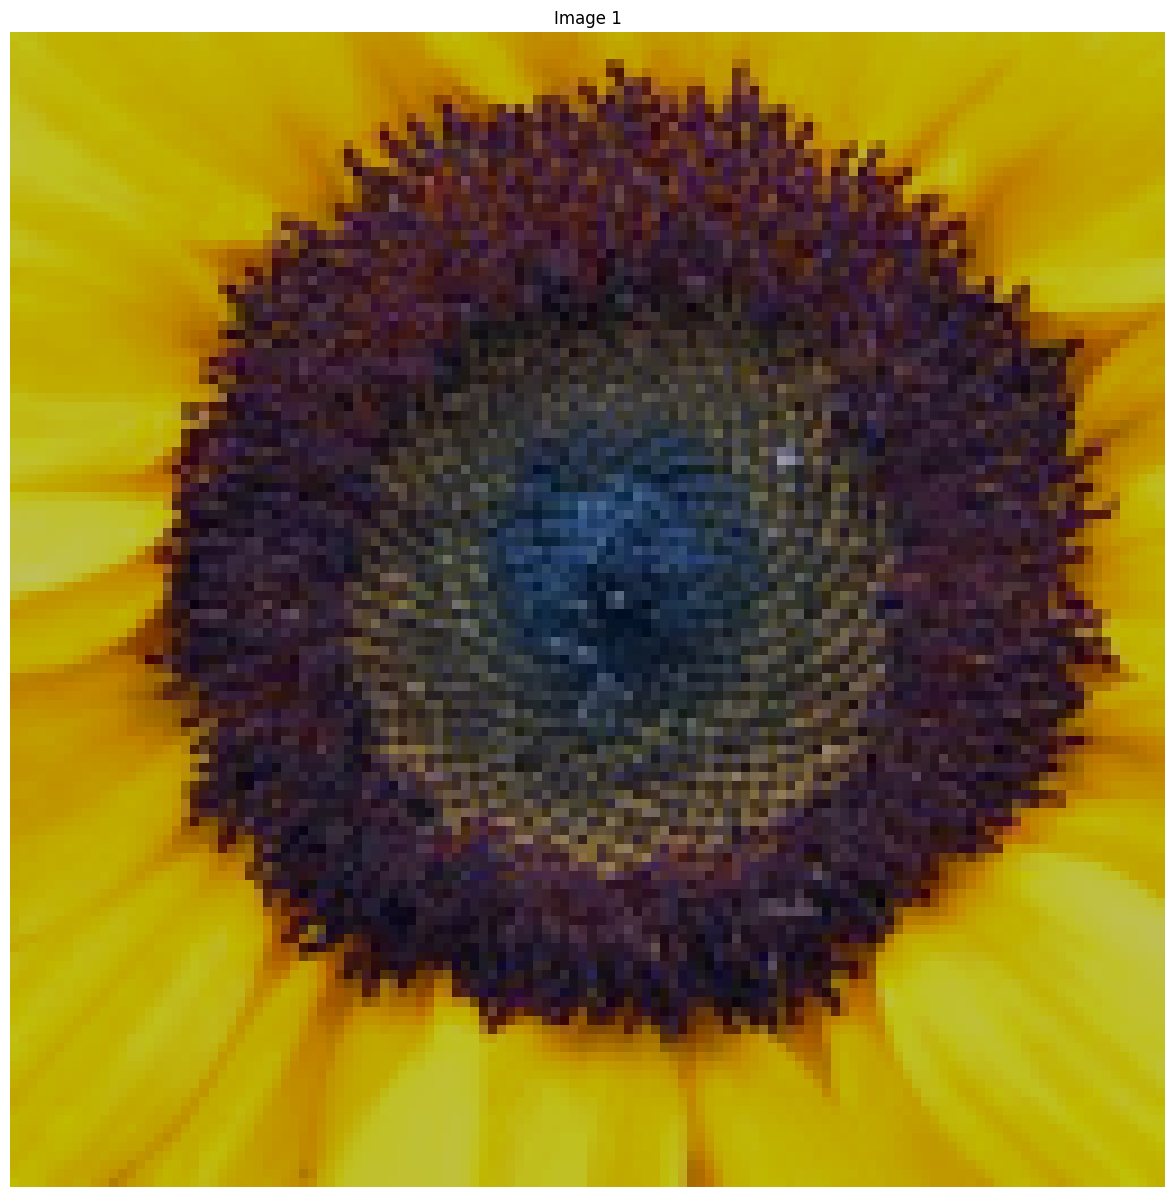

In [ ]:
# Fungsi untuk menampilkan gambar dari dataset
def display_images(dataset, num_images=5):
    plt.figure(figsize=(15, 15))

    # Ambil satu batch gambar dari dataset
    for i, (images, _) in enumerate(dataset.take(1)):
        for j in range(num_images):
            plt.subplot(1, num_images, j+1)
            img = images[j].numpy()  # Convert tensor to numpy array
            img = (img * 192).astype(np.uint8)  # Convert from [0, 1] to [0, 255]
            plt.imshow(img)
            plt.axis('off')
            plt.title(f'Image {i*num_images + j + 1}')

    plt.show()

# Tampilkan 5 gambar
display_images(train_dataset_192, num_images=1)


In [ ]:
from tensorflow.keras.regularizers import l2

num_classes =104
# Ukuran gambar yang akan digunakan
IMAGE_SIZE_192 = (128, 128)
IMAGE_SIZE_224 = IMAGE_SIZE_192
IMAGE_SIZE_331 = IMAGE_SIZE_192
IMAGE_SIZE_512 = IMAGE_SIZE_192


# Model Sequential sesuai dengan yang kamu buat
def build_custom_cnn_model(num_classes, image_size):
    model = tf.keras.Sequential([

        # First Convolutional Block
        layers.Conv2D(filters=32, kernel_size=3, activation="relu", padding='same',
                      kernel_regularizer=regularizers.l2(0.01),
                      input_shape=[*image_size, 3]),
        layers.MaxPool2D(),
        layers.Dropout(0.2),

        # Second Convolutional Block
        layers.Conv2D(filters=64, kernel_size=3, activation="relu", padding='same',
                      kernel_regularizer=regularizers.l2(0.01)),
        layers.MaxPool2D(),
        layers.Dropout(0.3),

        # Third Convolutional Block
        layers.Conv2D(filters=128, kernel_size=3, activation="relu", padding='same',
                      kernel_regularizer=regularizers.l2(0.01)),
        layers.MaxPool2D(),
        layers.Dropout(0.3),

        # Classifier Head
        layers.Flatten(),
        layers.Dense(units=128, activation="relu", kernel_regularizer=regularizers.l2(0.01)),
        layers.Dropout(0.5),
        layers.Dense(units=num_classes, activation="softmax")
    ])
    return model

# Callback untuk Early Stopping dan Model Checkpoint
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)

checkpoint_192 = tf.keras.callbacks.ModelCheckpoint(
    'best_model_192.keras',
    save_best_only=True,
    monitor='val_loss'
)

checkpoint_224 = tf.keras.callbacks.ModelCheckpoint(
    'best_model_224.keras',
    save_best_only=True,
    monitor='val_loss'
)

checkpoint_331 = tf.keras.callbacks.ModelCheckpoint(
    'best_model_331.keras',
    save_best_only=True,
    monitor='val_loss'
)

checkpoint_512 = tf.keras.callbacks.ModelCheckpoint(
    'best_model_512.keras',
    save_best_only=True,
    monitor='val_loss'
)

# Membangun dan mengkompilasi model dengan berbagai ukuran gambar

# Ukuran 192x192
model_192 = build_custom_cnn_model(num_classes, IMAGE_SIZE_192)
model_192.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
print("Input Shape (192):", model_192.input_shape)
model_192.summary()

# Ukuran 224x224
model_224 = build_custom_cnn_model(num_classes, IMAGE_SIZE_224)
model_224.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
print("Input Shape (224):", model_224.input_shape)
model_224.summary()

# Ukuran 331x331
model_331 = build_custom_cnn_model(num_classes, IMAGE_SIZE_331)
model_331.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
print("Input Shape (331):", model_331.input_shape)
model_331.summary()

# Ukuran 512x512
model_512 = build_custom_cnn_model(num_classes, IMAGE_SIZE_512)
model_512.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)
print("Input Shape (512):", model_512.input_shape)
model_512.summary()


Input Shape (192): (None, 128, 128, 3)


/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 104)            │        13,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,301,096 (16.41 MB)

 Trainable params: 4,301,096 (16.41 MB)

 Non-trainable params: 0 (0.00 B)

Input Shape (224): (None, 128, 128, 3)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 104)            │        13,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,301,096 (16.41 MB)

 Trainable params: 4,301,096 (16.41 MB)

 Non-trainable params: 0 (0.00 B)

Input Shape (331): (None, 128, 128, 3)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_8 (Dropout)             │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_10 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_11 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 104)            │        13,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,301,096 (16.41 MB)

 Trainable params: 4,301,096 (16.41 MB)

 Non-trainable params: 0 (0.00 B)

Input Shape (512): (None, 128, 128, 3)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_13 (Dropout)            │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_14 (Dropout)            │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,194,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_15 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 104)            │        13,416 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,301,096 (16.41 MB)

 Trainable params: 4,301,096 (16.41 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Menghitung jumlah langkah per epoch dan validasi untuk setiap ukuran gambar
# Untuk dataset 192x192
steps_per_epoch_192 = (NUM_TRAINING_IMAGES_192 // batch_size)
validation_steps_192 = (NUM_VALIDATION_IMAGES_192 // batch_size)

# Untuk dataset 224x224
steps_per_epoch_224 = NUM_TRAINING_IMAGES_224 // batch_size
validation_steps_224 = NUM_VALIDATION_IMAGES_224 // batch_size

# Untuk dataset 331x331
steps_per_epoch_331 = NUM_TRAINING_IMAGES_331 // batch_size
validation_steps_331 = NUM_VALIDATION_IMAGES_331 // batch_size

# Untuk dataset 512x512
steps_per_epoch_512 = NUM_TRAINING_IMAGES_512 // batch_size
validation_steps_512 = NUM_VALIDATION_IMAGES_512 // batch_size

# Print hasil perhitungan
print(f"Steps per epoch (192x192): {steps_per_epoch_192}")
print(f"Validation steps (192x192): {validation_steps_192}")

print(f"Steps per epoch (224x224): {steps_per_epoch_224}")
print(f"Validation steps (224x224): {validation_steps_224}")

print(f"Steps per epoch (331x331): {steps_per_epoch_331}")
print(f"Validation steps (331x331): {validation_steps_331}")

print(f"Steps per epoch (512x512): {steps_per_epoch_512}")
print(f"Validation steps (512x512): {validation_steps_512}")


Steps per epoch (192x192): 398
Validation steps (192x192): 116
Steps per epoch (224x224): 398
Validation steps (224x224): 116
Steps per epoch (331x331): 398
Validation steps (331x331): 116
Steps per epoch (512x512): 398
Validation steps (512x512): 116


In [ ]:
for images, labels in train_dataset_192.take(1):
    print("Shape of images:", images.shape)
    print("Shape of labels:", labels.shape)


Shape of images: (32, 128, 128, 3)
Shape of labels: (32,)


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Definisikan callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
checkpoint_192 = ModelCheckpoint('best_model_192.keras', monitor='val_loss', save_best_only=True)
checkpoint_224 = ModelCheckpoint('best_model_224.keras', monitor='val_loss', save_best_only=True)
checkpoint_331 = ModelCheckpoint('best_model_331.keras', monitor='val_loss', save_best_only=True)
checkpoint_512 = ModelCheckpoint('best_model_512.keras', monitor='val_loss', save_best_only=True)
epochs = 5

In [ ]:
# Melatih model 192x192
history_192 = model_192.fit(
    train_dataset_192,  # Dataset training untuk ukuran gambar 192x192
    validation_data=val_dataset_192,  # Dataset validasi untuk ukuran gambar 192x192
    epochs=epochs,  # Jumlah epochs (sesuaikan sesuai kebutuhan)
    steps_per_epoch=steps_per_epoch_192,  # Jumlah langkah per epoch
    validation_steps=validation_steps_192,  # Jumlah langkah validasi
    callbacks=[early_stopping, checkpoint_192]  # Callback EarlyStopping dan ModelCheckpoint
)

Epoch 1/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 246s 612ms/step - accuracy: 0.0523 - loss: 5.4575 - val_accuracy: 0.1102 - val_loss: 4.0988
Epoch 2/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 243s 612ms/step - accuracy: 0.0795 - loss: 4.1179 - val_accuracy: 0.1223 - val_loss: 3.8711
Epoch 3/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 242s 608ms/step - accuracy: 0.0981 - loss: 3.9867 - val_accuracy: 0.1277 - val_loss: 3.7185
Epoch 4/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 241s 605ms/step - accuracy: 0.1101 - loss: 3.9025 - val_accuracy: 0.1482 - val_loss: 3.6498
Epoch 5/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 240s 602ms/step - accuracy: 0.1111 - loss: 3.8839 - val_accuracy: 0.1490 - val_loss: 3.6311


In [ ]:

# Fungsi untuk memproses dataset dan menghasilkan DataFrame dari model
def generate_predictions(model, test_dataset):
    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)  # Ambil argmax untuk label

    ids = []
    for batch in test_dataset:
        _, batch_ids = batch
        ids.extend(batch_ids.numpy())  # Mengumpulkan ID dari batch

    # Membuat DataFrame
    df = pd.DataFrame({
        'id': ids,
        'label': predicted_labels
    })
    return df

# Menghasilkan DataFrame untuk setiap model
df_192 = generate_predictions(model_192, test_dataset_192)


231/231 ━━━━━━━━━━━━━━━━━━━━ 37s 160ms/step


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
df_192

,id,label
0,b'aeb67eefb',103
1,b'2213dd7ad',103
2,b'edecaff0a',49
3,b'37e16acde',67
4,b'b9e60ac3b',49
...,...,...
7377,b'581ead9fe',67
7378,b'8c5e0c760',103
7379,b'd7a9e0691',49
7380,b'1da642ca9',103


In [ ]:
# Melatih model 224x224
history_224 = model_224.fit(
    train_dataset_224,  # Dataset training untuk ukuran gambar 224x224
    validation_data=val_dataset_224,  # Dataset validasi untuk ukuran gambar 224x224
    epochs=epochs,  # Jumlah epochs (sesuaikan sesuai kebutuhan)
    steps_per_epoch=steps_per_epoch_224,  # Jumlah langkah per epoch
    validation_steps=validation_steps_224,  # Jumlah langkah validasi
    callbacks=[early_stopping, checkpoint_224]  # Callback EarlyStopping dan ModelCheckpoint
)

Epoch 1/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 248s 618ms/step - accuracy: 0.0478 - loss: 5.4610 - val_accuracy: 0.0792 - val_loss: 4.1901
Epoch 2/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 243s 612ms/step - accuracy: 0.0670 - loss: 4.1971 - val_accuracy: 0.1088 - val_loss: 3.9296
Epoch 3/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 245s 615ms/step - accuracy: 0.0833 - loss: 4.0545 - val_accuracy: 0.1212 - val_loss: 3.7758


In [ ]:
df_224 = generate_predictions(model_224, test_dataset_224)

231/231 ━━━━━━━━━━━━━━━━━━━━ 38s 163ms/step


/opt/conda/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


In [ ]:
# Melatih model 331x331
history_331 = model_331.fit(
    train_dataset_331,  # Dataset training untuk ukuran gambar 331x331
    validation_data=val_dataset_331,  # Dataset validasi untuk ukuran gambar 331x331
    epochs=epochs,  # Jumlah epochs (sesuaikan sesuai kebutuhan)
    steps_per_epoch=steps_per_epoch_331,  # Jumlah langkah per epoch
    validation_steps=validation_steps_331,  # Jumlah langkah validasi
    callbacks=[early_stopping, checkpoint_331]  # Callback EarlyStopping dan ModelCheckpoint
)

Epoch 1/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 252s 627ms/step - accuracy: 0.0500 - loss: 5.4007 - val_accuracy: 0.1008 - val_loss: 4.0201
Epoch 2/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 249s 627ms/step - accuracy: 0.0777 - loss: 4.1157 - val_accuracy: 0.1220 - val_loss: 3.7730
Epoch 3/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 249s 626ms/step - accuracy: 0.0976 - loss: 3.9592 - val_accuracy: 0.1374 - val_loss: 3.7231


In [ ]:
df_331 = generate_predictions(model_331, test_dataset_331)

231/231 ━━━━━━━━━━━━━━━━━━━━ 39s 170ms/step


In [ ]:
# Melatih model 512x512
history_512 = model_512.fit(
    train_dataset_512,
    validation_data=val_dataset_512,
    epochs=epochs,
    steps_per_epoch=steps_per_epoch_512,
    validation_steps=validation_steps_512,
    callbacks=[early_stopping, checkpoint_512]
)

Epoch 1/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 261s 649ms/step - accuracy: 0.0529 - loss: 5.2025 - val_accuracy: 0.1059 - val_loss: 3.9654
Epoch 2/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 272s 685ms/step - accuracy: 0.0895 - loss: 4.0626 - val_accuracy: 0.1393 - val_loss: 3.7268
Epoch 3/5
398/398 ━━━━━━━━━━━━━━━━━━━━ 262s 659ms/step - accuracy: 0.1024 - loss: 3.9202 - val_accuracy: 0.1387 - val_loss: 3.6998


In [ ]:
df_512 = generate_predictions(model_512, test_dataset_512)

231/231 ━━━━━━━━━━━━━━━━━━━━ 46s 197ms/step


In [ ]:

# Fungsi untuk memproses dataset dan menghasilkan DataFrame dari model
def generate_predictions(model, test_dataset):
    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)  # Ambil argmax untuk label

    ids = []
    for batch in test_dataset:
        _, batch_ids = batch
        ids.extend(batch_ids.numpy())  # Mengumpulkan ID dari batch

    # Membuat DataFrame
    df = pd.DataFrame({
        'id': ids,
        'label': predicted_labels
    })
    return df

# Menghasilkan DataFrame untuk setiap model
df_224 = generate_predictions(model_224, test_dataset_224)


231/231 ━━━━━━━━━━━━━━━━━━━━ 38s 166ms/step


In [ ]:

# Fungsi untuk memproses dataset dan menghasilkan DataFrame dari model
def generate_predictions(model, test_dataset):
    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)  # Ambil argmax untuk label

    ids = []
    for batch in test_dataset:
        _, batch_ids = batch
        ids.extend(batch_ids.numpy())  # Mengumpulkan ID dari batch

    # Membuat DataFrame
    df = pd.DataFrame({
        'id': ids,
        'label': predicted_labels
    })
    return df

# Menghasilkan DataFrame untuk setiap model
df_331 = generate_predictions(model_331, test_dataset_331)


231/231 ━━━━━━━━━━━━━━━━━━━━ 40s 172ms/step


In [ ]:

# Fungsi untuk memproses dataset dan menghasilkan DataFrame dari model
def generate_predictions(model, test_dataset):
    predictions = model.predict(test_dataset)
    predicted_labels = np.argmax(predictions, axis=1)  # Ambil argmax untuk label

    ids = []
    for batch in test_dataset:
        _, batch_ids = batch
        ids.extend(batch_ids.numpy())  # Mengumpulkan ID dari batch

    # Membuat DataFrame
    df = pd.DataFrame({
        'id': ids,
        'label': predicted_labels
    })
    return df

# Menghasilkan DataFrame untuk setiap model
df_512 = generate_predictions(model_512, test_dataset_512)


231/231 ━━━━━━━━━━━━━━━━━━━━ 45s 193ms/step


In [ ]:
import pandas as pd
# Menggabungkan semua DataFrame
df = pd.concat([df_192, df_224, df_331, df_512])


In [ ]:
df

,id,label
0,b'aeb67eefb',103
1,b'2213dd7ad',103
2,b'edecaff0a',49
3,b'37e16acde',67
4,b'b9e60ac3b',49
...,...,...
7377,b'a024aee0f',67
7378,b'c199140c3',67
7379,b'589fe7959',67
7380,b'd6c7e918e',67


In [ ]:
# Menghapus prefix 'b' dan tanda kutip dari kolom 'id' jika bertipe bytes
df['id'] = df['id'].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# Menampilkan hasil
print(df)


             id  label
0     aeb67eefb    103
1     2213dd7ad    103
2     edecaff0a     49
3     37e16acde     67
4     b9e60ac3b     49
...         ...    ...
7377  a024aee0f     67
7378  c199140c3     67
7379  589fe7959     67
7380  d6c7e918e     67
7381  e46998f4d     67

[29528 rows x 2 columns]


In [ ]:
# Menyimpan dataframe tanpa duplikat ke file CSV baru
# Menghapus baris yang memiliki duplikat di kolom 'id'
df_clean = df.drop_duplicates(subset='id', keep='first')

# Menampilkan dataframe yang sudah bersih dari duplikat
print(df_clean)

df_clean.to_csv('submission.csv', index=False)


             id  label
0     aeb67eefb    103
1     2213dd7ad    103
2     edecaff0a     49
3     37e16acde     67
4     b9e60ac3b     49
...         ...    ...
7377  581ead9fe     67
7378  8c5e0c760    103
7379  d7a9e0691     49
7380  1da642ca9    103
7381  40ff0c11f     67

[7382 rows x 2 columns]


NameError: name 'df' is not defined